## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 40000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


def wildeford_max_gdp_frac():
    small_project = sq.lognorm(1 / (250*K), 1 / (3*K))
    modern_megaproject = sq.lognorm(1/K, 1/600)
    old_form_megaproject = sq.lognorm(1/K, 1/150)
    gigaproject = sq.lognorm(1/150, 1/50)
    
    r_ = random.random()
    if r_ < 0.1:
        gdp_frac = small_project
        percent_spent_on_compute = sq.lognorm(0.5, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.7:
        gdp_frac = modern_megaproject
        percent_spent_on_compute = sq.lognorm(0.7, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.9:
        gdp_frac = old_form_megaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.95, lclip=0.1, rclip=0.999)
    else:
        gdp_frac = gigaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.99, lclip=0.1, rclip=0.999)
        
    models_trained_per_year_for_budget = sq.lognorm(1, 10)

    return ~gdp_frac * ~percent_spent_on_compute / ~models_trained_per_year_for_budget


variables = {'initial_gdp': 23*T,
             'tai_flop_size': sq.sample(load_cache_file='caches/meta_anchor'),  # Cache generated in "Anchors" notebook
             'algo_doubling_rate_max': 3,
             'algo_doubling_rate_min': 1,
             'min_reduction': 2,
             'max_reduction': 5,
             'initial_flop_per_dollar': 18.3,
             'flop_halving_rate': sq.norm(2.5, 3),       # https://epochai.org/blog/predicting-gpu-performance
             'max_flop_per_dollar': sq.lognorm(21, 24),  # https://epochai.org/blog/predicting-gpu-performance
             'initial_pay': sq.mixture([[0.8, 7.2],
                                        [0.1, sq.lognorm(7.2, 9)],
                                        [0.1, sq.lognorm(9, 10)]]),  # https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
             'gdp_growth': sq.lognorm(1.01, 1.035, lclip=1.005),
             'max_gdp_frac': wildeford_max_gdp_frac, # TODO: Willingness to spend connected to commercialization
             'spend_doubling_time': sq.norm(1, 4.5, lclip=1),
             'initial_chance_of_nonscaling_issue': 0.95,
             'final_chance_of_nonscaling_issue': 0.2,
             'nonscaling_issue_bottom_year': 2040,
             'nonscaling_delay': sq.mixture([sq.lognorm(3, 8), sq.lognorm(10, 40)], weights=0.8)}

print('Loaded')


Loaded


## Run Wildeford timelines model

## RUN TIMELINES MODEL ##
Generating Bayes net with 6 cores...


40020it [07:48, 85.47it/s]                                                                                                                                                                                  

Shuffling data...
Waiting for other cores...
.

100%|██████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 964.47it/s]

...Collected!
Caching in-memory...
...Cached!
Writing cache to file `caches/tai_years.sqcache`...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2029',
 '10%: 2032',
 '15%: 2034',
 '20%: 2037',
 '25%: 2039',
 '35%: 2043',
 '50%: 2053',
 '60%: 2065',
 '75%: >2123',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 6 years from now',
 '10%: 9 years from now',
 '15%: 11 years from now',
 '20%: 14 years from now',
 '25%: 16 years from now',
 '35%: 20 years from now',
 '50%: 30 years from now',
 '60%: 42 years from now',
 '75%: >100 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 0.4%
2024-2027: 0.5%
2028-2029: 4.7%
2030-2034: 9.4%
2035-2039: 12.2%
2040-2049: 18.1%
2050-2059: 11.2%
2060-2069: 5.1%
2070-2079: 2.2%
2080-2089: 1.2%
2090-2099: 0.8%
2100-2109: 0.5%
2110-2119: 0.5%
>2120: 33.1%
-
#

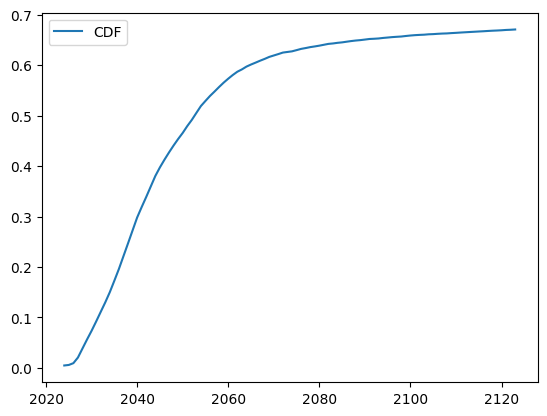

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

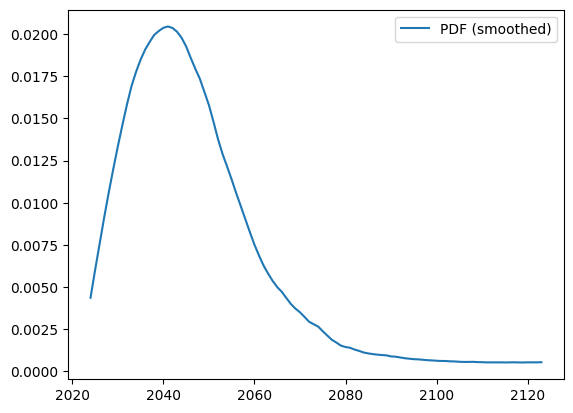

-
-
## TAI FLOP SIZE ##
{1: 23.6,
 5: 25.8,
 10: 27.1,
 20: 28.5,
 30: 29.8,
 40: 31.3,
 50: 32.9,
 60: 34.8,
 70: 36.9,
 80: 39.0,
 90: 42.8,
 95: 45.8,
 99: 52.1}


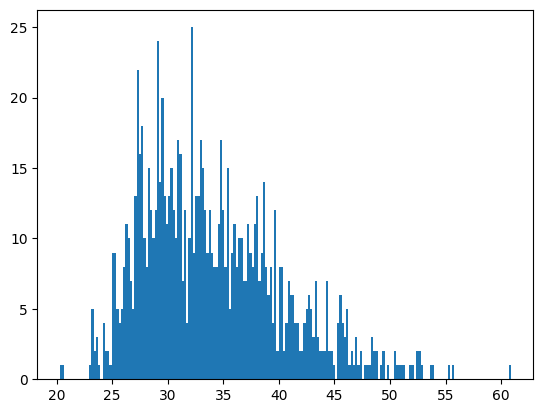

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 1 ##
-
## MAX ALGO DOUBLING RATE: 3 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE ##
{1: 3.1,
 5: 3.0,
 10: 3.0,
 20: 2.9,
 30: 2.8,
 40: 2.8,
 50: 2.8,
 60: 2.7,
 70: 2.7,
 80: 2.6,
 90: 2.6,
 95: 2.5,
 99: 2.4}


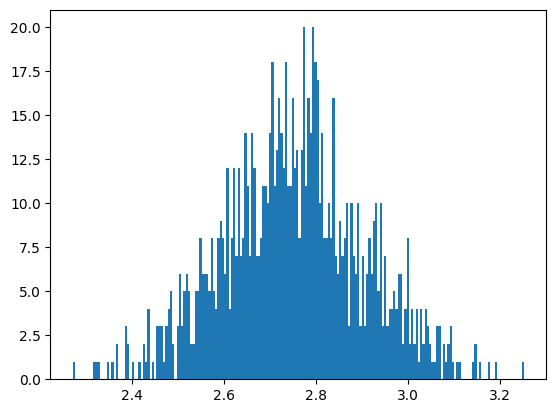

-
-
## MAX FLOP PER DOLLAR ##
{1: 20.4,
 5: 21.0,
 10: 21.2,
 20: 21.6,
 30: 21.9,
 40: 22.2,
 50: 22.4,
 60: 22.7,
 70: 22.9,
 80: 23.2,
 90: 23.6,
 95: 24.0,
 99: 24.4}


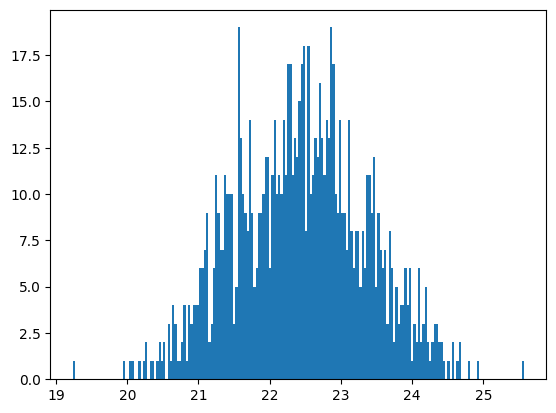

-
-
## INITIAL PAY ##
{1: 7.2,
 5: 7.2,
 10: 7.2,
 20: 7.2,
 30: 7.2,
 40: 7.2,
 50: 7.2,
 60: 7.2,
 70: 7.2,
 80: 7.2,
 90: 8.9,
 95: 9.5,
 99: 9.9}


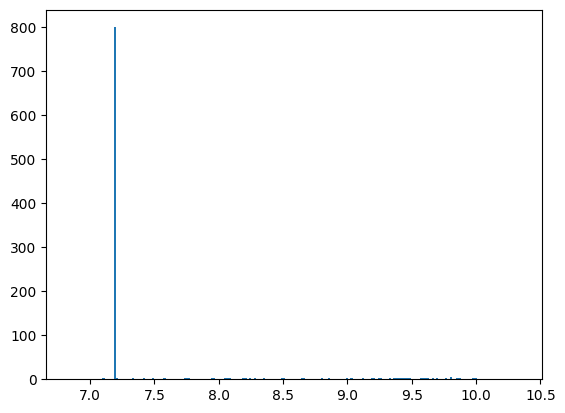

-
-
## GDP GROWTH ##
{1: 1.01,
 5: 1.01,
 10: 1.01,
 20: 1.02,
 30: 1.02,
 40: 1.02,
 50: 1.02,
 60: 1.02,
 70: 1.03,
 80: 1.03,
 90: 1.03,
 95: 1.03,
 99: 1.04}


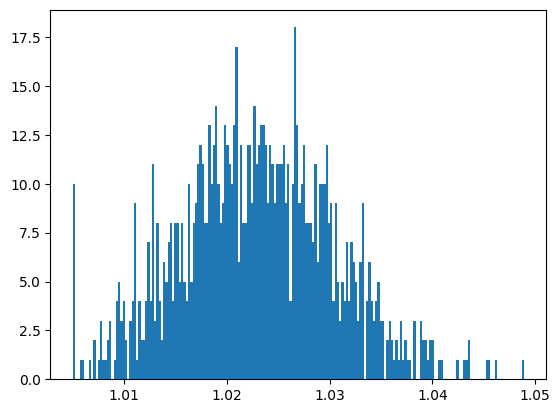

-
-
## MAX GDP FRAC ##
{1: 0.0,
 5: 2e-05,
 10: 0.0001,
 20: 0.00017,
 30: 0.00025,
 40: 0.00033,
 50: 0.00043,
 60: 0.00056,
 70: 0.00075,
 80: 0.0011,
 90: 0.00239,
 95: 0.0044,
 99: 0.00961}


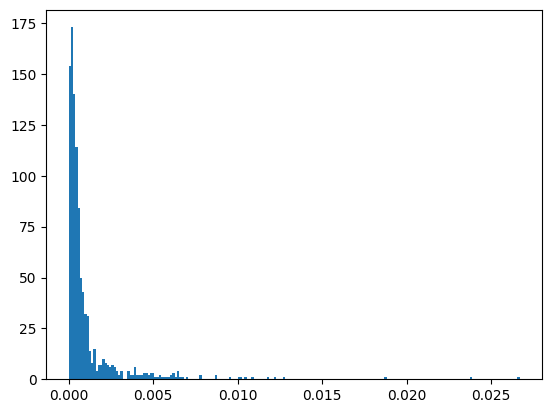

-
-
## NONSCALING DELAY ##
{1: 2,
 5: 3,
 10: 3,
 20: 4,
 30: 4,
 40: 5,
 50: 5,
 60: 6,
 70: 7,
 80: 11,
 90: 21,
 95: 26,
 99: 37}


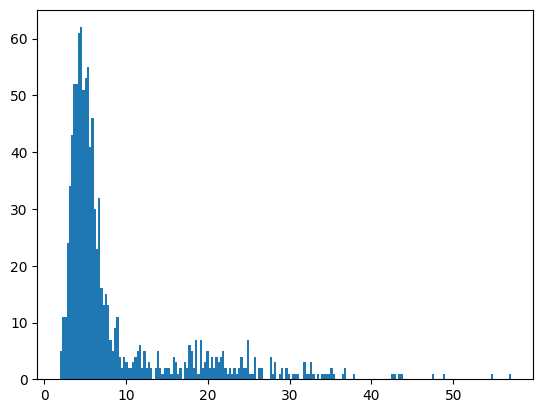

-
-
## SPEND DOUBLING TIME ##
{1: 5.3,
 5: 4.5,
 10: 4.1,
 20: 3.7,
 30: 3.3,
 40: 3.0,
 50: 2.8,
 60: 2.5,
 70: 2.2,
 80: 1.9,
 90: 1.4,
 95: 1.0,
 99: 1.0}


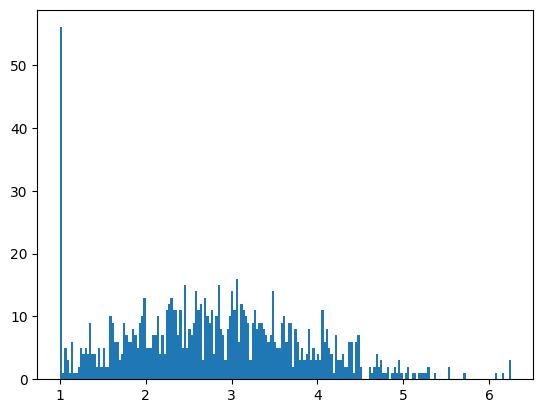

-
-
-
-
## GDP Over Time ##


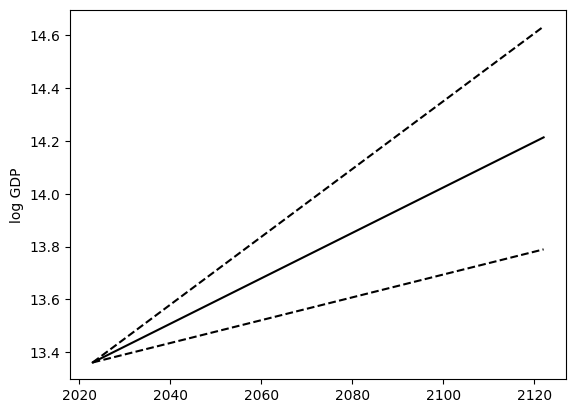

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~30 trillion)
Year: 2033

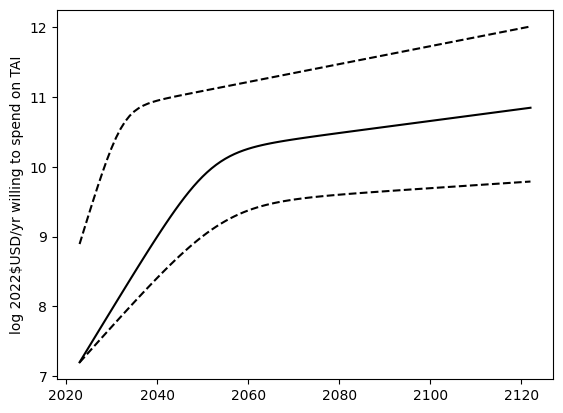

Year: 2023 - willingness log 2022$USD per year 7.2 (~16 million) 90% CI 7.2 (~16 million) - 8.9 (~783 million)
Year: 2024 - willingness log 2022$USD per year 7.3 (~20 million) 90% CI 7.3 (~19 million) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 7.4 (~26 million) 90% CI 7.3 (~22 million) - 9.3 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 7.5 (~33 million) 90% CI 7.4 (~26 million) - 9.5 (~3 billion)
Year: 2027 - willingness log 2022$USD per year 7.6 (~42 million) 90% CI 7.5 (~31 million) - 9.7 (~5 billion)
Year: 2028 - willingness log 2022$USD per year 7.7 (~54 million) 90% CI 7.6 (~36 million) - 9.9 (~8 billion)
Year: 2029 - willingness log 2022$USD per year 7.8 (~70 million) 90% CI 7.6 (~43 million) - 10.1 (~13 billion)
Year: 2030 - willingness log 2022$USD per year 7.9 (~89 million) 90% CI 7.7 (~51 million) - 10.3 (~18 billion)
Year: 2031 - willingness log 2022$USD per year 8.1 (~114 million) 90% CI 7.8 (~60 million) - 10.4 (~26 billion)
Year: 2032

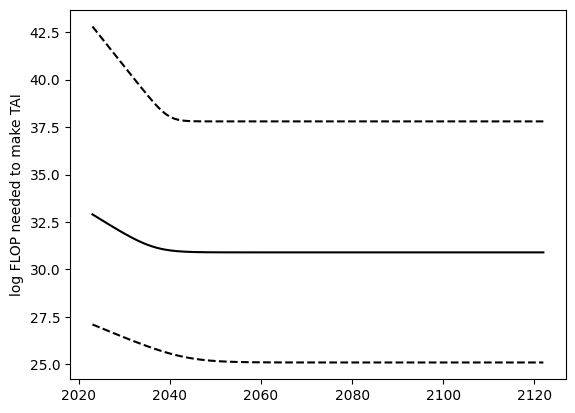

Year: 2023 - log FLOP needed for TAI 32.9 (~794 nonillion) 90% CI 27.1 (~1 octillion) - 42.8 (~6 billion decillion)
Year: 2024 - log FLOP needed for TAI 32.8 (~570 nonillion) 90% CI 27.0 (~1 octillion) - 42.5 (~3 billion decillion)
Year: 2025 - log FLOP needed for TAI 32.6 (~405 nonillion) 90% CI 26.9 (~806 septillion) - 42.2 (~2 billion decillion)
Year: 2026 - log FLOP needed for TAI 32.5 (~289 nonillion) 90% CI 26.8 (~642 septillion) - 41.9 (~789 million decillion)
Year: 2027 - log FLOP needed for TAI 32.3 (~207 nonillion) 90% CI 26.7 (~512 septillion) - 41.6 (~394 million decillion)
Year: 2028 - log FLOP needed for TAI 32.2 (~148 nonillion) 90% CI 26.6 (~409 septillion) - 41.3 (~197 million decillion)
Year: 2029 - log FLOP needed for TAI 32.0 (~107 nonillion) 90% CI 26.5 (~327 septillion) - 41.0 (~99 million decillion)
Year: 2030 - log FLOP needed for TAI 31.9 (~78 nonillion) 90% CI 26.4 (~262 septillion) - 40.7 (~49 million decillion)
Year: 2031 - log FLOP needed for TAI 31.8 (~58 

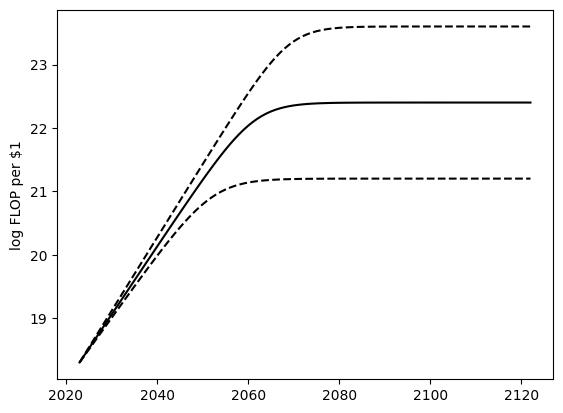

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.6 (~4 quintillion) 90% CI 18.6 (~4 quintillion) - 18.6 (~4 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.8 (~7 quintillion) 90% CI 18.8 (~6 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 18.9 (~9 quintillion) 90% CI 18.9 (~8 quintillion) - 19.0 (~10 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~11 quintillion) 90% CI 19.0 (~10 quintillion) - 19.1 (~13 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.2 (~14 quintillion) 90% CI 19.1 (~13 quintillion) - 19.2 (~17 quintil

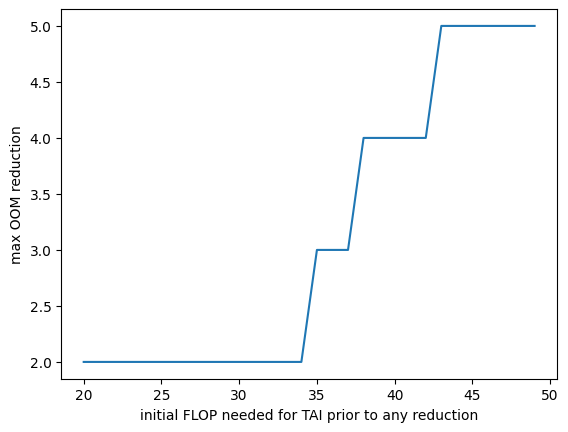

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

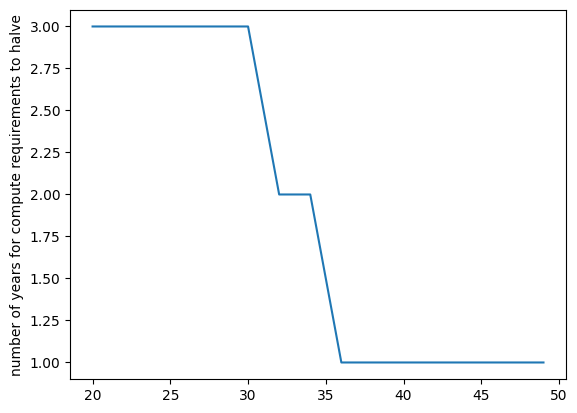

TAI log FLOP 20 -> algo doubling rate 3.0yrs
TAI log FLOP 21 -> algo doubling rate 3.0yrs
TAI log FLOP 22 -> algo doubling rate 3.0yrs
TAI log FLOP 23 -> algo doubling rate 3.0yrs
TAI log FLOP 24 -> algo doubling rate 3.0yrs
TAI log FLOP 25 -> algo doubling rate 3.0yrs
TAI log FLOP 26 -> algo doubling rate 3.0yrs
TAI log FLOP 27 -> algo doubling rate 3.0yrs
TAI log FLOP 28 -> algo doubling rate 3.0yrs
TAI log FLOP 29 -> algo doubling rate 3.0yrs
TAI log FLOP 30 -> algo doubling rate 3.0yrs
TAI log FLOP 31 -> algo doubling rate 2.5yrs
TAI log FLOP 32 -> algo doubling rate 2.0yrs
TAI log FLOP 33 -> algo doubling rate 2.0yrs
TAI log FLOP 34 -> algo doubling rate 2.0yrs
TAI log FLOP 35 -> algo doubling rate 1.5yrs
TAI log FLOP 36 -> algo doubling rate 1.0yrs
TAI log FLOP 37 -> algo doubling rate 1.0yrs
TAI log FLOP 38 -> algo doubling rate 1.0yrs
TAI log FLOP 39 -> algo doubling rate 1.0yrs
TAI log FLOP 40 -> algo doubling rate 1.0yrs
TAI log FLOP 41 -> algo doubling rate 1.0yrs
TAI log FL

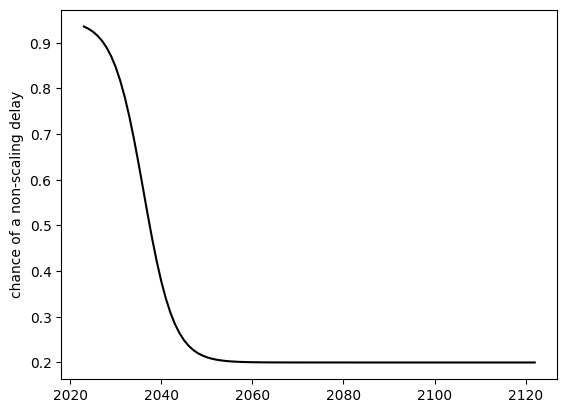

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 93%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 82%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 78%
Year: 2033

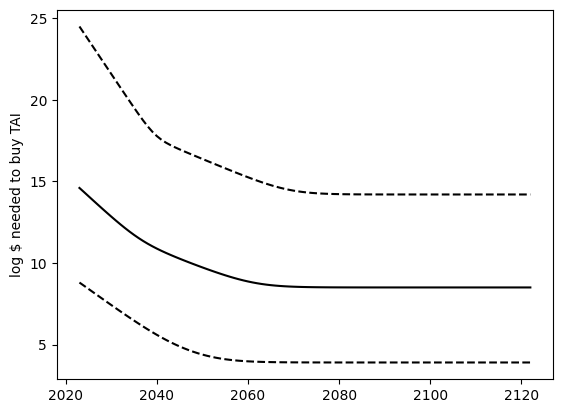

Year: 2023 - 14.6 log 2022$USD to buy TAI (~398 trillion) 90% CI 8.8 (~632 million) - 24.5 (~3 septillion)
Year: 2024 - 14.3 log 2022$USD to buy TAI (~223 trillion) 90% CI 8.6 (~403 million) - 24.1 (~1 septillion)
Year: 2025 - 14.1 log 2022$USD to buy TAI (~124 trillion) 90% CI 8.4 (~255 million) - 23.7 (~464 sextillion)
Year: 2026 - 13.8 log 2022$USD to buy TAI (~69 trillion) 90% CI 8.2 (~161 million) - 23.2 (~178 sextillion)
Year: 2027 - 13.6 log 2022$USD to buy TAI (~38 trillion) 90% CI 8.0 (~102 million) - 22.8 (~68 sextillion)
Year: 2028 - 13.3 log 2022$USD to buy TAI (~22 trillion) 90% CI 7.8 (~65 million) - 22.4 (~26 sextillion)
Year: 2029 - 13.1 log 2022$USD to buy TAI (~12 trillion) 90% CI 7.6 (~41 million) - 22.0 (~10 sextillion)
Year: 2030 - 12.8 log 2022$USD to buy TAI (~7 trillion) 90% CI 7.4 (~26 million) - 21.6 (~4 sextillion)
Year: 2031 - 12.6 log 2022$USD to buy TAI (~4 trillion) 90% CI 7.2 (~17 million) - 21.2 (~1 sextillion)
Year: 2032 - 12.4 log 2022$USD to buy TAI 

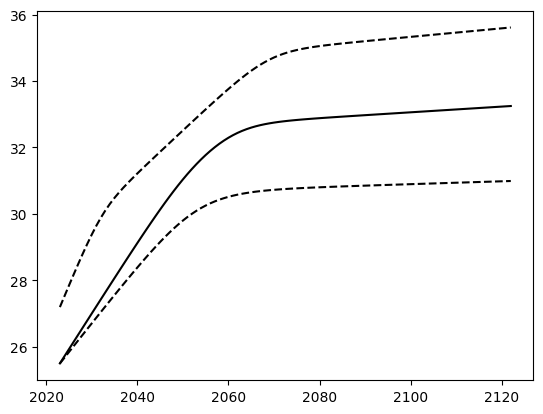

Year: 2023 - max log FLOP 25.5 (~32 septillion) 90% CI 25.5 (~31 septillion) - 27.2 (~2 octillion)
Year: 2024 - max log FLOP 25.7 (~52 septillion) 90% CI 25.7 (~47 septillion) - 27.5 (~3 octillion)
Year: 2025 - max log FLOP 25.9 (~85 septillion) 90% CI 25.8 (~70 septillion) - 27.8 (~7 octillion)
Year: 2026 - max log FLOP 26.1 (~139 septillion) 90% CI 26.0 (~104 septillion) - 28.2 (~15 octillion)
Year: 2027 - max log FLOP 26.4 (~228 septillion) 90% CI 26.2 (~154 septillion) - 28.5 (~31 octillion)
Year: 2028 - max log FLOP 26.6 (~374 septillion) 90% CI 26.4 (~229 septillion) - 28.8 (~62 octillion)
Year: 2029 - max log FLOP 26.8 (~613 septillion) 90% CI 26.5 (~341 septillion) - 29.1 (~124 octillion)
Year: 2030 - max log FLOP 27.0 (~1 octillion) 90% CI 26.7 (~507 septillion) - 29.4 (~238 octillion)
Year: 2031 - max log FLOP 27.2 (~2 octillion) 90% CI 26.9 (~752 septillion) - 29.6 (~439 octillion)
Year: 2032 - max log FLOP 27.4 (~3 octillion) 90% CI 27.0 (~1 octillion) - 29.9 (~770 octillio

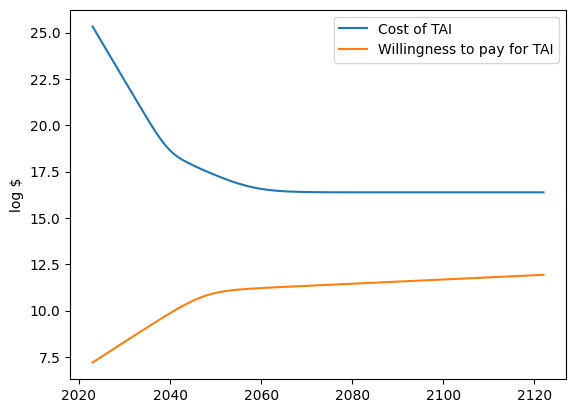

-
-
## SAMPLE RUN 2 ##
It takes 29.1 log FLOP (~125 octillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.7 years they get 2x cheaper, to a maximum of 21.3 log FLOP (~2 sextillion) per 2022$USD.
We are willing to pay 7.2 log 2022$USD (~16 million) and this doubles every 4.7 years to a max of 0.000332% of GDP. GDP grows at a rate of 1.034x per year.
If a non-scaling delay happens, it will take an additional 5.2 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 25.5 max log FLOP (32 septillion) available - TAI takes 29.1 log FLOP (125 octillion) - log $ 10.8 to buy TAI (63 billion) vs. willingness to pay log $ 7.2 (16 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 25.7 max log FLOP (47 septillion) available - TAI takes 29.0 log FLOP (100 octillion) - log $ 10.6 to buy TAI (39 billion) vs. willingness to pay l

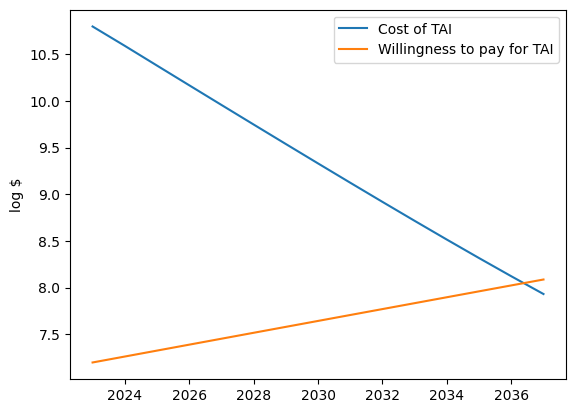

-
-
## SAMPLE RUN 3 ##
It takes 35.8 log FLOP (~659 decillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.8 years they get 2x cheaper, to a maximum of 22.0 log FLOP (~10 sextillion) per 2022$USD.
We are willing to pay 8.0 log 2022$USD (~95 million) and this doubles every 2.6 years to a max of 0.001195% of GDP. GDP grows at a rate of 1.021x per year.
If a non-scaling delay happens, it will take an additional 29.5 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.3 max log FLOP (189 septillion) available - TAI takes 35.8 log FLOP (659 decillion) - log $ 17.5 to buy TAI (330 quadrillion) vs. willingness to pay log $ 8.0 (95 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 26.5 max log FLOP (314 septillion) available - TAI takes 35.6 log FLOP (416 decillion) - log $ 17.2 to buy TAI (163 quadrillion) vs. willin

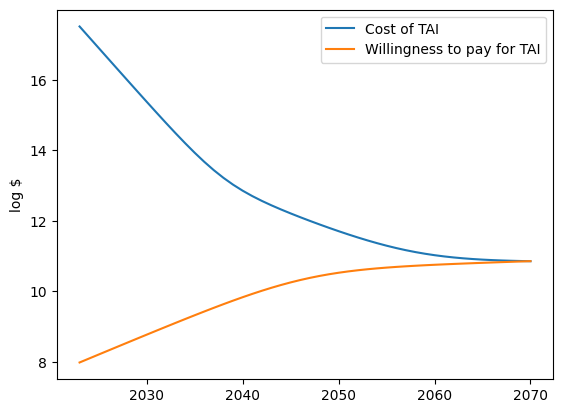

In [3]:
run_timelines_model(variables, cores=6, runs=RUNS, dump_cache_file='caches/tai_years')